<a href="https://colab.research.google.com/github/devt287/applied_stat/blob/main/HW7_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### generate dataset (W_i, X_i, Y_i) with size 100

set.seed("2023")
n = 100 # sample size
X = runif(n, min = -1, max = 1) # covariate X uniformly distributed on [-1, 1]
W = as.logical(rbinom(n, 1, plogis(4*X - 1))) # e(X) = P(W=1|X) = logistic(4*X-1)
tau = 2 # true treatment effect
# Gaussian outcomes with mu_0(X) = 0.2+0.3*X, mu_1(X) = mu_0(X) + tau
Y = rnorm(n, mean = W * (0.2 + 0.3*X + tau) + (1-W) * (0.2 + 0.3*X), sd = 0.2)
df = data.frame(W, X, Y) # construct data frame

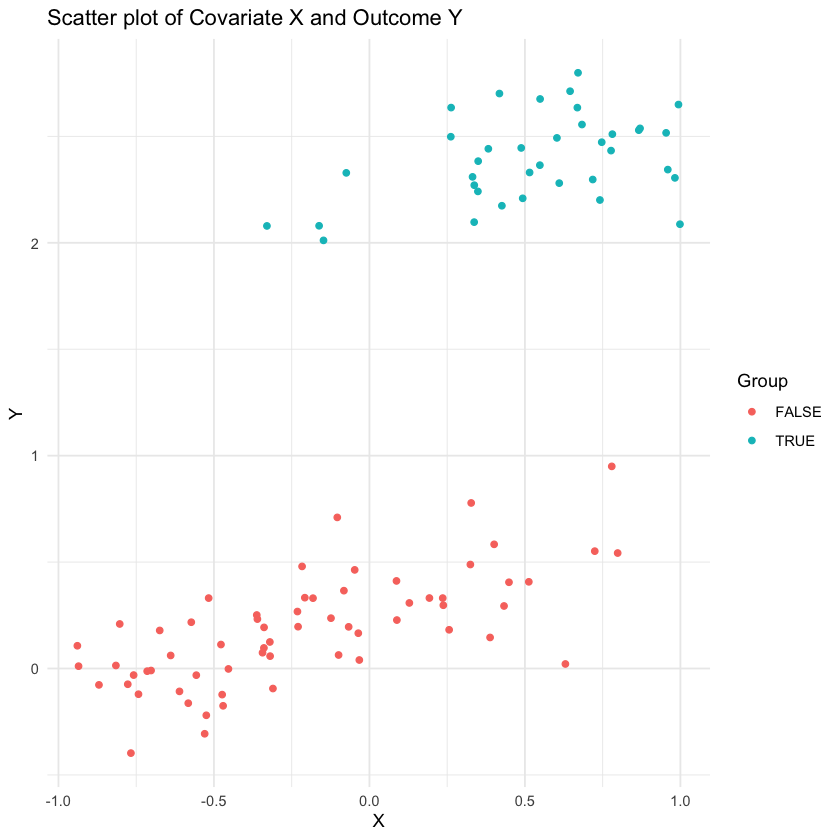

In [3]:
library("ggplot2")

### YOUR CODE (~1 line): using ggplot, plot a scatter plot of (X_i, Y_i);
# you should use different colors for the control group and treatment group.
ggplot(df, aes(x = X, y = Y, color = factor(W))) +
  geom_point() +
  labs(color = "Group") +
  theme_minimal() +
  ggtitle("Scatter plot of Covariate X and Outcome Y")

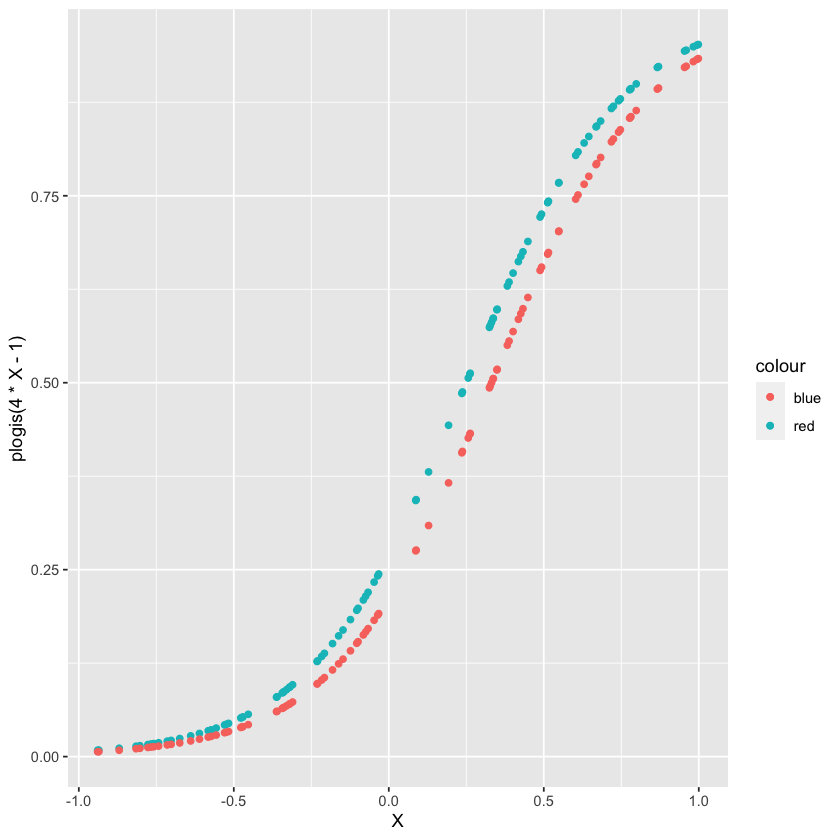

In [4]:
### YOUR CODE (~2 lines):
# use logistic regression to fit W ~ X;
# compute the fitted propensity scores e_hat for every X and
# add them to the data frame df.
logistic_model <- glm(W ~ X, family = binomial, data = df)
df$e_hat <- predict(logistic_model, type = "response")

# plot the true and estimated propensities scores
ggplot(df,aes(x=X)) + geom_point(aes(y=plogis(4*X-1), color = "red")) +
  geom_point(aes(y=e_hat, color = "blue"))

In [5]:
### YOUR CODE (~1 line): based on e_hat, compute the IPW estimator for tau;
# for simplicity, no sample splitting / cross validation is applied here.
IPW <- with(df, mean(W * Y / e_hat - (1 - W) * Y / (1 - e_hat)))

print(IPW)

[1] 1.648279


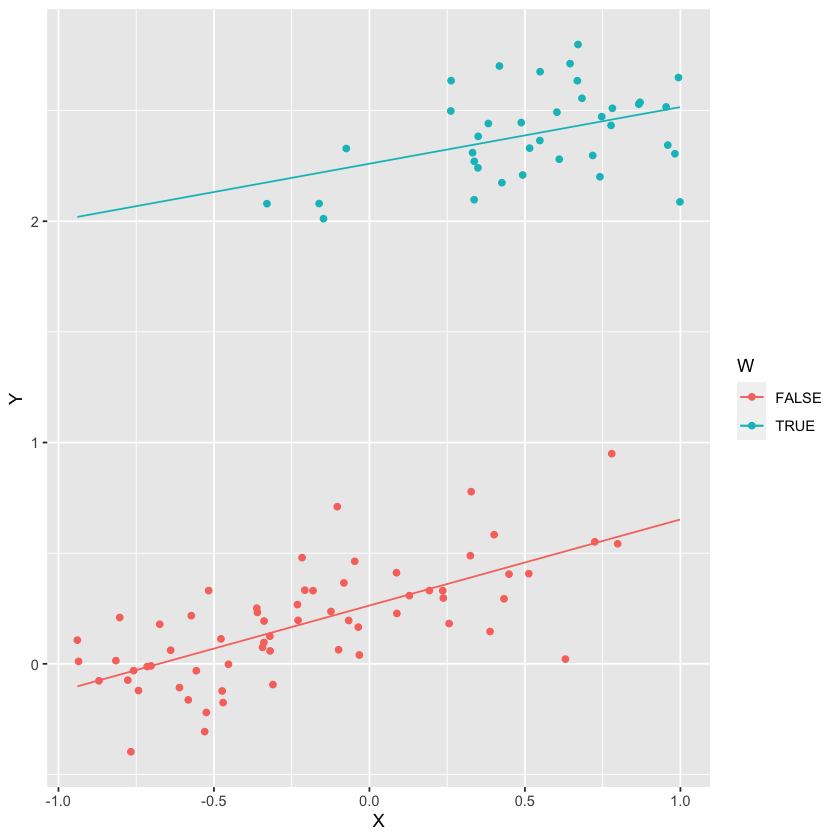

In [8]:
### YOUR CODE (~4 lines):
# use linear regression to fit Y on X for both control and treatment groups;
# compute the fitted mean outcomes mu_1_hat and mu_0_hat for every X and
# add them to the data frame df.
# Fit linear regression to estimate mu_1_hat for the treatment group (W=1)
model_treated <- lm(Y ~ X, data = df[df$W == 1,])

# Fit linear regression to estimate mu_0_hat for the control group (W=0)
model_control <- lm(Y ~ X, data = df[df$W == 0,])
df$mu_1_hat <- predict(model_treated, newdata = df)
df$mu_0_hat <- predict(model_control, newdata = df)

# plot the true and estimated outcomes for both the control group and treatment group
ggplot(df, aes(x=X)) + geom_point(aes(y = Y, color = W)) +
  geom_line(aes(y=mu_1_hat, color=TRUE)) +
  geom_line(aes(y=mu_0_hat, color=FALSE))

In [9]:
### YOUR CODE (~1 line): based on (e_hat, mu_1_hat, mu_0_hat), compute the AIPW estimator for tau;
# for simplicity, no sample splitting / cross validation is applied here.
AIPW <- with(df, mean((W * (Y - mu_1_hat) / e_hat) - ((1 - W) * (Y - mu_0_hat) / (1 - e_hat)) + (mu_1_hat - mu_0_hat)))


print(AIPW)

[1] 1.95684
